In this issue of Beacondigest, we first revisit our previous analysis on Oceanic Games<span class="reference bibliography" refid="milnor1978values"></span> and refine our methodology to produce better results. We also build a better intiution on the metric - value per unit resource and look closely into how it affects centralization in PoS Ethereum.

## Improved methodology for large staker detections

As stated in the previous notebook, a major flaw in our approach was that entities were classified based on their wallet addresses, which means that entities that activate validators through more than one wallet are not classified together. 

To overcome this challenge we proposed a new methodology - identify the addresses that belong to major staking pools by:

1) Directly referring to the list of Eth1 addresses in the list published on [beaconcha.in](https://beaconcha.in/pools) which in itself is quite extensive.

2) Searching for addresses that have public name tags that mention these major staking pools on [Etherscan](https://etherscan.io/) to add to the previously compiled list of addresses.

Once we identify the wallet addresses of these entities, we then proceed to edit our previous database to aggregate the ETH staked by all these entities.

In further issues, we plan to once again refine the methodology and come up with a better way to identify major staking entities.

## Analysis

In [1]:
#Import all the modules 

import requests
import json
import csv
import math
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
from time import *

import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pd.options.plotting.backend = "plotly"
pio.renderers.default = "plotly_mimetype+notebook_connected"
from plotly.subplots import make_subplots

In [2]:
df = pd.read_csv('staking_pools.csv')
df['Percentage Stake'] = (df['Stake']/df['Stake'].sum())

nan_value = float("NaN")
df.replace("", nan_value, inplace=True)
df.dropna(subset = ["Service"], inplace=True)

lst = df.index[df['Stake'] > 0].tolist()
d = {}

for i in lst:
    if(d.get(df['Service'][i]) != None):
        d[df['Service'][i]] += df['Percentage Stake'][i]
    else:
        d[df['Service'][i]] = df['Percentage Stake'][i]

df1 = pd.DataFrame(d.items())
df1.rename(columns = {0: "service", 1: "percentage_stake"}, inplace=True)
df1.sort_values('percentage_stake',ascending=False)

,service,percentage_stake
5,Kraken,0.145224
18,Binance,0.057429
7,Whale,0.041999
20,Lido,0.035372
3,Bitcoin Suisse,0.033422
11,Staked.us,0.025786
9,Stakefish,0.021061
17,Huobi,0.016219
8,Defi,0.012037
4,Stkr,0.009317


The above table captures all the major staking entities that were identified based on our refined methodology in the descending order of the percentage of staked ether they possess. We will consider the first 9 major entities to be atomic players in our oceanic game of ETH staking, since they control more than 1% of the network.

Before we try and estimate the values per unit resource for the 9 major staking entities and the ocean, let us consider three cases to better understand how this metric can be a measure of centralization risks in PoS Ethereum.

All three cases are consistent with the current distribution of resources among all major stakers and the ocean -- the ocean controls nearly 61% of all the staked Ether while 9 major atomic players control the remaining 49%.

**CASE 1**: High degree of centralization - The largest staker controls 90% of all the resourcers that the atomic players possess, that is - they control 35% of the entire network. This is a highly suboptimal situation since one entity controls more than 33% of all of the network's resources which raises a lot of redflags. The remaining 10% of the resources is equally divided among the remaining atomic players.

**CASE 2**: Minimal degree of centralizations - All the atomic players control an equal share of resources, that is - all atomic players control about 4.3% of all of the network's resources. Given the 61-49 distribution, this situation can be considered the most optimal since the % of resources that each atomic player possesses is minimized. 

We now once again use the publicly available [ssocean software](http://homepages.warwick.ac.uk/~ecaae/ssocean.html) to find the ssindices of the atomic and non-atomic players and divide this by the amount of resources they each possess to find their values per unit resource for the two cases described and for the PoS Ethereum network.

In [3]:
ss_index = [0.167672,0.058603,0.042164,0.035271,0.033261,0.025467,0.020705,0.015870,0.011731,0.589256]
resource_percentage = [0.145200,0.057400,0.042000,0.035400,0.033400,0.025800,0.021100,0.016200,0.012000,0.611500]

value_per_unit_resource = []

ss_index_1 = [0.507689, 0.003661, 0.003661, 0.003661, 0.003661, 0.003661, 0.003661, 0.003661, 0.003661, 0.463025]
resource_percentage_1 = [0.350000, 0.004800, 0.004800, 0.004800, 0.004800, 0.004800, 0.004800, 0.004800, 0.004800, 0.611600]

value_per_unit_resource_1 = []

ss_index_2 = [0.044279,0.044279,0.044279,0.044279,0.044279,0.044279,0.044279,0.044279,0.044279,0.601489]
resource_percentage_2 = [0.043100,0.043100,0.043100,0.043100,0.043100,0.043100,0.043100,0.043100,0.043100,0.612100]

value_per_unit_resource_2 = []

for i in range(10):
    value_per_unit_resource.append(ss_index[i]/resource_percentage[i])
    value_per_unit_resource_1.append(ss_index_1[i]/resource_percentage_1[i])
    value_per_unit_resource_2.append(ss_index_2[i]/resource_percentage_2[i])
    
x_axis = [1,2,3,4,5,6,7,8,9,10]

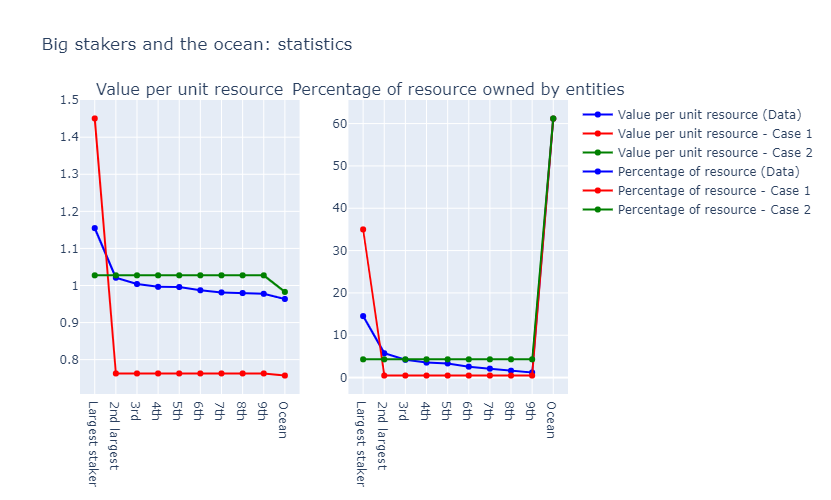

In [4]:
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=["Value per unit resource", "Percentage of resource owned by entities"]
)

fig.add_trace(
    go.Scatter(x=x_axis, y=value_per_unit_resource, name="Value per unit resource (Data)",  marker = dict(color = "blue")),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=x_axis, y=value_per_unit_resource_1, name="Value per unit resource - Case 1", marker = dict(color = "red")),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=x_axis, y=value_per_unit_resource_2, name="Value per unit resource - Case 2",  marker = dict(color = "green")),
    row=1, col=1
)


fig.add_trace(
    go.Scatter(x=x_axis, y=[r * 100 for r in resource_percentage], name="Percentage of resource (Data)",  marker = dict(color = "blue")),
    row=1, col=2
)


fig.add_trace(
    go.Scatter(x=x_axis, y=[r * 100 for r in resource_percentage_1], name="Percentage of resource - Case 1", marker = dict(color = "red")),
    row=1, col=2
)


fig.add_trace(
    go.Scatter(x=x_axis, y=[r * 100 for r in resource_percentage_2], name="Percentage of resource - Case 2",  marker = dict(color = "green")),
    row=1, col=2
)


fig.update_layout(
    height=500,
    width=875,
    title_text="Big stakers and the ocean: statistics"   
)
fig.update_xaxes(
    row=1, col=1,
    tickmode="array", tickvals=np.arange(1,11), ticktext=["Largest staker", "2nd largest", "3rd", "4th", "5th", "6th", "7th", "8th", "9th", "Ocean"]
)
fig.update_xaxes(
    row=1, col=2,
    tickmode="array", tickvals=np.arange(1,11), ticktext=["Largest staker", "2nd largest", "3rd", "4th", "5th", "6th", "7th", "8th", "9th", "Ocean"]
)
fig.show()

As we notice form the results, the idea "the larger the mining pool, the larger its value per unit resource" still holds in this case. However, what is important here is we see that the difference in this metric between the largest staker and the rest of the network is a lot higher in the first case. 

When the power imblanace is stronger like in the first case, it generates a stronger motive for entities and other oceanic players to collude with the largest staker since each unit resource (in this case ETH) that the largest staker pools in is a lot more "valuable" than that of the other players. This is thus a sign of a network in which a lot of power being concentrated in the hands of a single entity.

In contrast, the third case shows a scenario where even though a difference in the value per unit resource between larger entities and the ocean exists, the urge for individual miners to collude with the largest staker is not as strong as the resources that the largest staker possesses is not as valuable now.

Another point to note here is that in the first case, only the first staker's value per unit resource is > 1 Eth. 1 here is a logical threshold here since having a value > 1 essentially deviates from the idea of 1 Eth 1 vote - 1 Eth from largest staker is worth more than just one vote. 

If we look into the PoS Ethereum network, three of the largest stakers in the network have values > 1 while everyone else has values < 1. 

In the most "ideal" case, we notice that all major entities have values > 1 while the ocean collectively has a value < 1. However, one thing to note here is that the difference in values between any one atomic player and the ocean is minimized in this scenario thereby making the network more "collusion-proof".

The paper - Oceanic Games: Centralization Risks and Incentives in Blockchain Mining <span class="reference bibliography" refid="leonardos2020oceanic"></span> considers many more scenarios with different initial distributions which are simulated. We highly recommend you give it a read if you want to dive deeper into the meaning of this useful metric!

## The Beacon Chain Digest - June 21st

We also continue our running analysis of the Beacon Chain through the lens of our 6 metrics. In this notebook, we take a look at epochs 42211 - 45328 (June 7th, 2:30AM GMT to June 22, 9:30 PM GMT). As always we start off with collecting data and processing the data.

In [5]:
files = ["attestor_slashing", "proposer_slashing", "block_count", "participation_rate", "exit_count", "deposits"]
dfs = []

for file in files:
    df = pd.read_csv(f"{file}.csv", header=None, names=["epoch", file])
    df.dropna(subset=["epoch"], inplace=True)
    dfs += [df[[file]]] # We don't want the epoch column

df = pd.concat([df[["epoch"]]] + dfs, axis=1) # Concat everything, with the epoch column first
df["participation_rate"] *= 100 # Set to percentages
df = df[df.epoch < max(df["epoch"])] # Remove last epoch (queried too soon)
df["epoch"] = df["epoch"].astype(int)

files = ["proposed_block_count_old", "global_participation_rate_old"]
dfs = []

for file in files:
    df1 = pd.read_csv(f"{file}.csv", header=None, names=["epoch", file])
    df1.dropna(subset=["epoch"], inplace=True)
    dfs += [df1[[file]]] # We don't want the epoch column

df1 = pd.concat([df1[["epoch"]]] + dfs, axis=1) # Concat everything, with the epoch column first
df1["global_participation_rate_old"] *= 100 # Set to percentages
df1 = df1[df1.epoch < max(df["epoch"])] # Remove last epoch (queried too soon)
df1["epoch"] = df1["epoch"].astype(int)

### Attester and proposer slashing

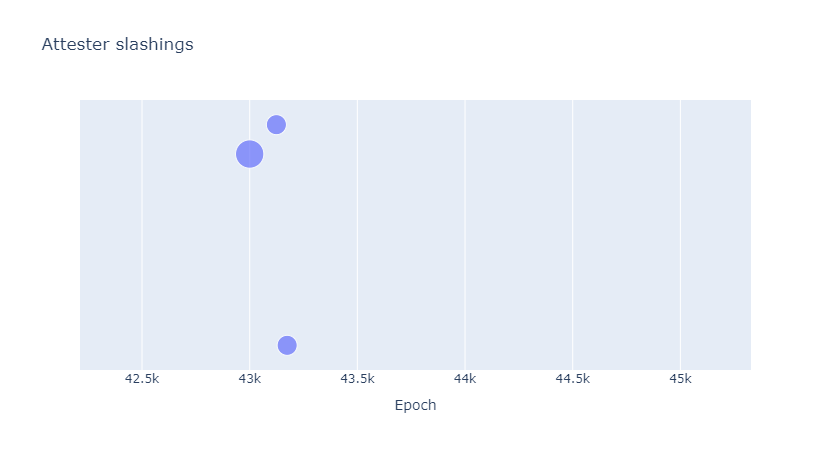

In [6]:
rng = np.random.default_rng(42)
df['temp'] = rng.uniform(0, 10, len(df["epoch"]))
fig = px.scatter(
    df[df.attestor_slashing > 0], x = 'epoch', y = 'temp', size = 'attestor_slashing',
    size_max = 20, labels = {"epoch": "Epoch"},
    title = f"Attester slashings"
)
fig.update_xaxes(range=(min(df["epoch"]), max(df["epoch"])))
fig.update_yaxes(visible=False)

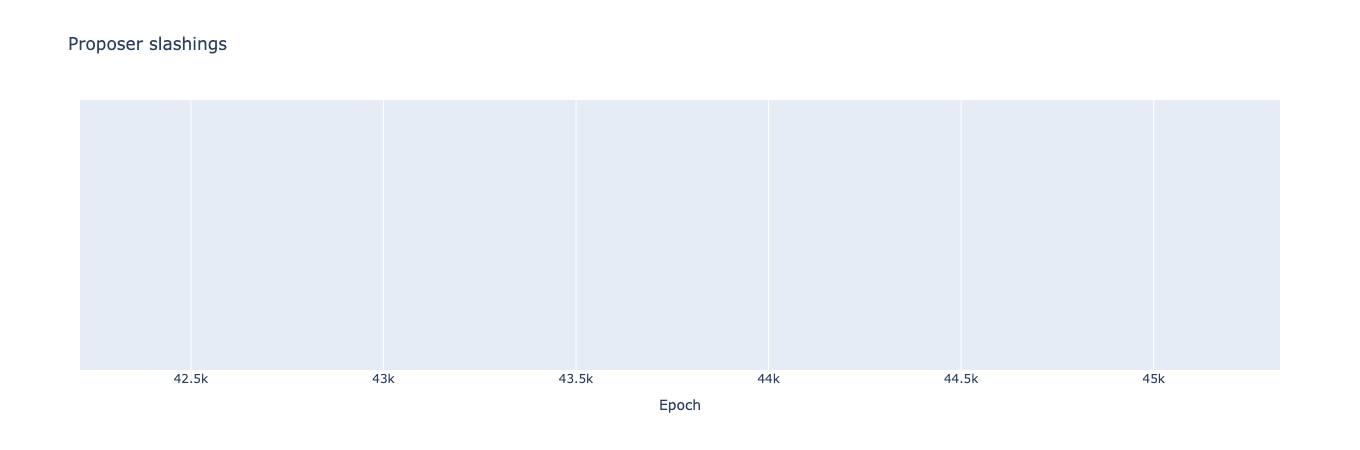

In [7]:
fig = px.scatter(
    df[df.proposer_slashing > 0], x = 'epoch', y = 'temp', size = 'proposer_slashing',
    size_max = 20, labels = {"epoch": "Epoch"},
    title = f"Proposer slashings"
)
fig.update_xaxes(range=(min(df["epoch"]), max(df["epoch"])))
fig.update_yaxes(visible=False)

Thus, we see that there have been 3 attester slashing events that occurred - 1 at epoch 43000 where two attesters were slashed and 2 at epochs 43124 and 43127 where one attester was slashed each.

There were also 0 proposer slashing events in this range of epochs.

### Proposed block count

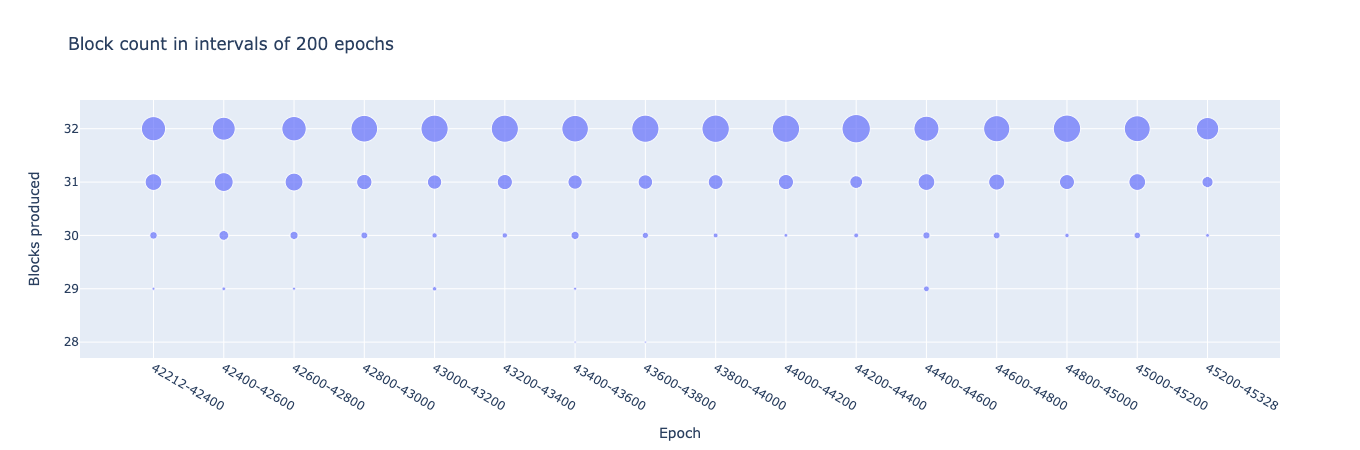

In [8]:
bucket_size = 200
df["bucket"] = np.floor_divide(df["epoch"], bucket_size)
df["n_bxs"] = 1
df_bucket = df[["bucket", "block_count", "n_bxs"]].groupby(["bucket", "block_count"]).sum("n_bxs").reset_index()
df_bucket["epoch"] = df_bucket.bucket.apply(
    lambda bucket: f"{max(min(df['epoch']), bucket * bucket_size)}-{min(max(df['epoch']), (bucket + 1) * bucket_size)}"
)

fig = px.scatter(df_bucket, x = 'epoch', y = 'block_count', size = 'n_bxs',
                 labels={ "block_count": "Blocks produced", "epoch": "Epoch", "n_bxs": "Count" },
                 title = f"Block count in intervals of {bucket_size} epochs")
fig

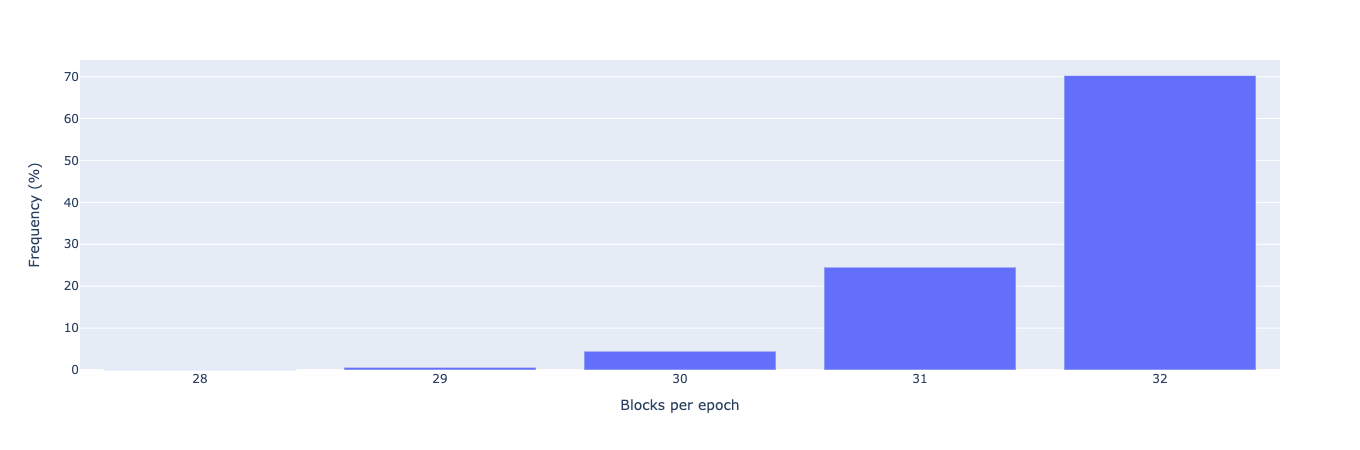

In [9]:
block_freq = df[['block_count']].value_counts(normalize=True).rename_axis('block_count').reset_index(name='freq')
block_freq["freq"] *= 100
px.bar(
    block_freq, x="block_count", y="freq", labels={"block_count": "Blocks per epoch", "freq": "Frequency (%)"}
)

The proposed block count for most epochs is still at 32! This means that validators have been consistently carrying out their block proposal duties well despite the surge in the number of validators activated, owing maybe to the availability of good educational material and staking tutorials. 

The network seemed to perform the best in this metric during epochs 44200 - 44400, where block proposals fell to 30 only thrice and never fell below 30.

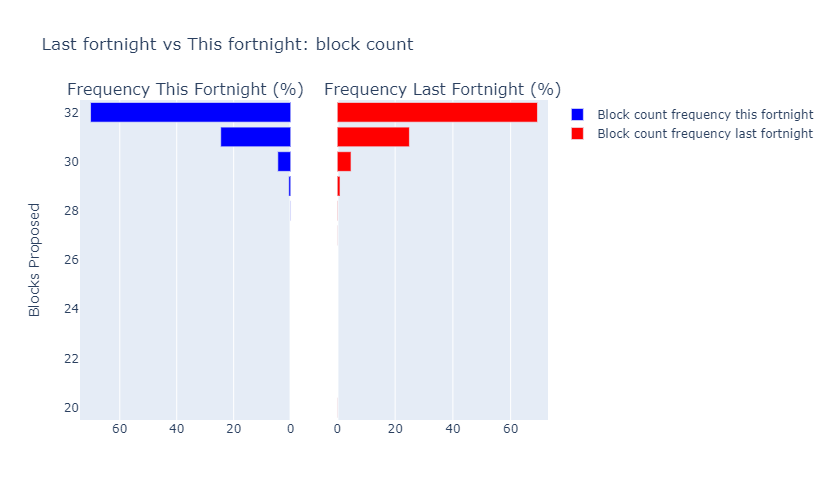

In [10]:
block_freq1 = df1[['proposed_block_count_old']].value_counts(normalize=True).rename_axis('block_count').reset_index(name='freq')
block_freq1["freq"] *= 100

fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=["Frequency This Fortnight (%)", "Frequency Last Fortnight (%)"], shared_xaxes=True,
                    shared_yaxes=True, horizontal_spacing=0.1)

fig.add_trace(
    go.Bar(x=block_freq["freq"], y=block_freq["block_count"], name="Block count frequency this fortnight", marker = dict(color = "blue"), orientation = 'h'),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=block_freq1["freq"], y=block_freq1["block_count"], name="Block count frequency last fortnight", marker = dict(color = "red"), orientation = 'h'),
    row=1, col=2
)

fig.update_layout(
    height=500,
    width=875,
    title_text="Last fortnight vs This fortnight: block count"   
)

fig.update_yaxes(
    row=1, col=1,
    title = "Blocks Proposed"
)

# fig.update_yaxes(
#     row=1, col=2,
#     title = "Blocks Proposed"
# )

fig.update_xaxes(
    row=1, col=1,
    autorange = "reversed"
)

If we compare the network's performance for this metric this fortnight and last fortnight, we see that the performance was very similar. This fortnight, however, we saw a rise in the frequency at which 32 blocks were proposed (though the difference is not very high - about 0.97%).

### Participation rate

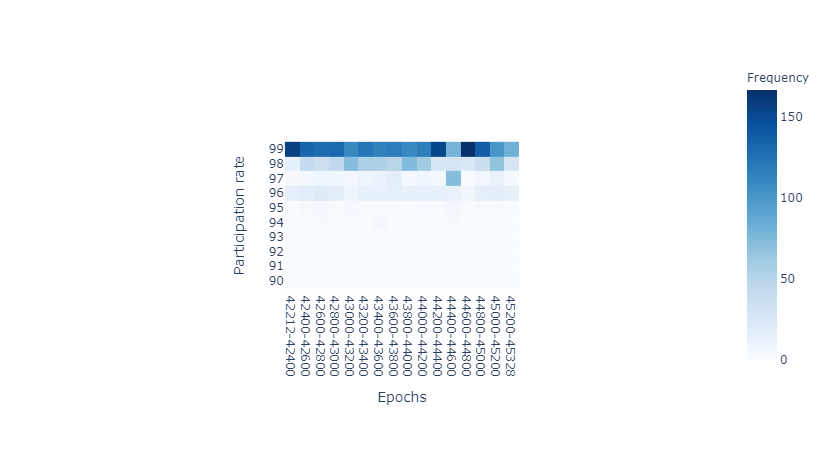

In [11]:
bins = pd.IntervalIndex.from_tuples([(i,i+1) for i in range(int(min(df["participation_rate"])), 100)][::-1])
df["participation_bin"] = pd.cut(df["participation_rate"], bins)
df_bucket = df[["bucket", "participation_bin", "n_bxs"]].groupby(["bucket", "participation_bin"]).sum("n_bxs").reset_index()
epoch_names = df_bucket.bucket.apply(
    lambda bucket: f"{max(min(df['epoch']), bucket * bucket_size)}-{min(max(df['epoch']), (bucket + 1) * bucket_size)}"
)
df_bucket["epoch"] = epoch_names
df_bucket = df_bucket[["participation_bin", "n_bxs", "epoch"]].pivot(index="participation_bin", columns=["epoch"])

px.imshow(
    df_bucket.to_numpy(),
    labels=dict(x="Epochs", y="Participation rate", color="Frequency"),
    x = sorted(list(set(epoch_names))),
    y = [str(s) for s in np.flip(np.arange(int(min(df["participation_rate"])), 100))],
    color_continuous_scale='blues'
)

In [12]:
mean = df['participation_rate'].mean()
std = df['participation_rate'].std()
mini = min(df['participation_rate'])
median = df['participation_rate'].quantile(0.5)
maxi = max(df['participation_rate'])

print("           participation statistics")
print("-----------------------------------------------")
print("mean: {}".format(mean))
print("standard devidation: {}".format(std))
print("")
print("minimum: {}".format(mini))
print("median: {}".format(median))
print("maximum: {}".format(maxi))

           participation statistics
-----------------------------------------------
mean: 98.76521211960089
standard devidation: 0.9228996808584423

minimum: 90.38034081459044
median: 99.09178018569946
maximum: 99.76736903190611


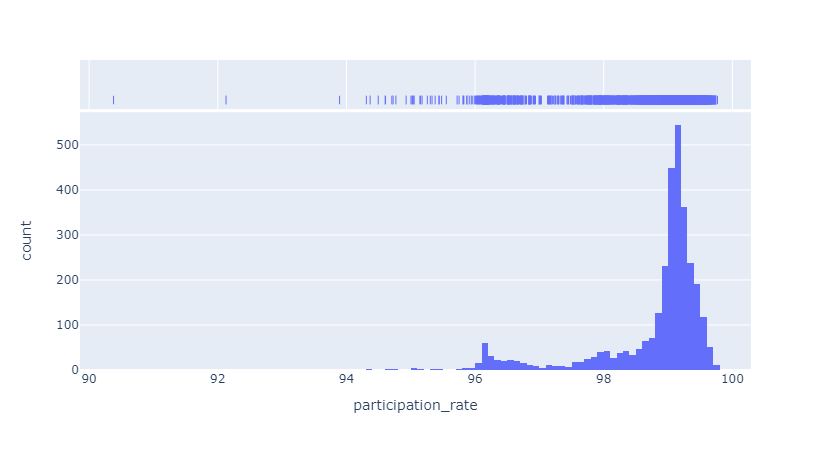

In [13]:
fig = px.histogram(df, x="participation_rate", marginal="rug")
fig.show()

The above statistics are, as last time, signs of a healthy network!

At around epoch 43425 the participation rate fell and once again fell even lower at around epoch 43050. The participation rate was the highest from epochs 42214 - 42412, 43710 - 43900 and from epoch 44550 onwards. 

The lowest participation rate for this range of epochs was around 90.4% (lower than last fortnight's lowest - 94%) and was recorded at epoch 44991. The highest participation rate was at around 99.97% for this range of epochs. Once again, most epochs had a participation rate of >99%.

### Exit counts

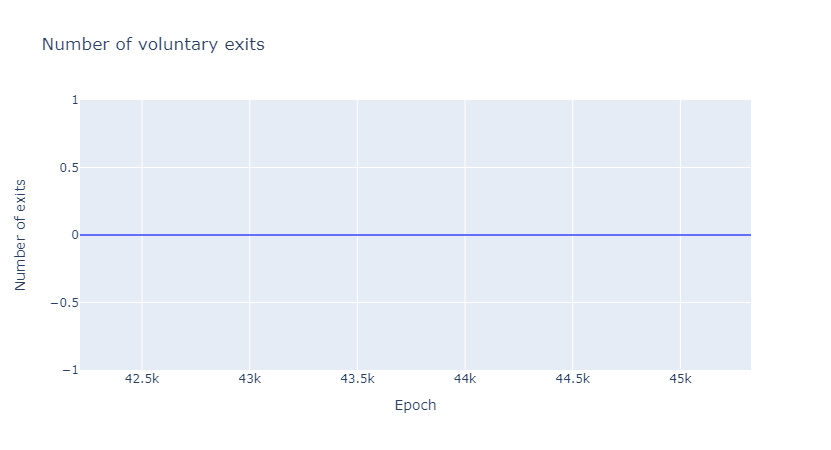

In [14]:
px.line(x=df['epoch'], y=df['exit_count'], labels = {"x": "Epoch", "y": "Number of exits"}, title = "Number of voluntary exits")

Thus, we see that once again there have been no exits among validators in this range of epochs.

### Deposit counts

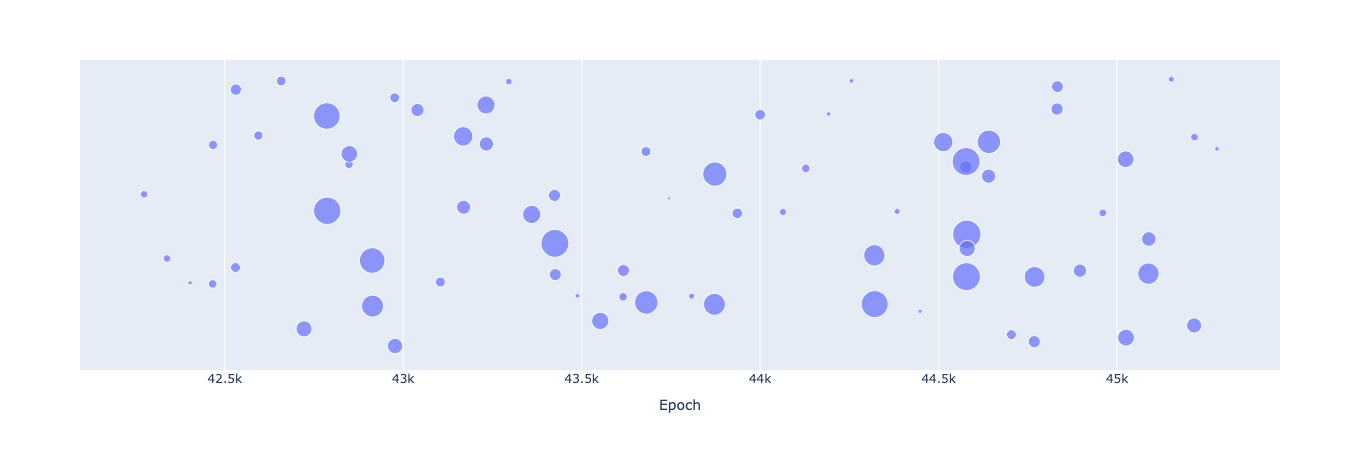

In [15]:
fig = px.scatter(
    df[df.deposits > 0], x = 'epoch', y = 'temp', size = 'deposits',
    size_max = 20, labels = {"epoch": "Epoch"})
fig.update_yaxes(visible=False)

The trend of having a handful of discrete epochs during which multiple validators were activated at once still holds for this range of epochs as well.

However, a few days back something strange was noticed. As reported in this [Reddit post](https://www.reddit.com/r/ethstaker/comments/o19fkz/there_is_a_huge_spike_of_double_deposit_64_eth/), there were a lot of validators in the queue with deposits of exactly 64 ETH that were pending. As covered by [Ben Edgington](https://twitter.com/benjaminion_xyz?ref_src=twsrc%5Egoogle%7Ctwcamp%5Eserp%7Ctwgr%5Eauthor) from Consensys in his newsletter [What's New in Eth2](https://hackmd.io/@benjaminion/eth2_news/https%3A%2F%2Fhackmd.io%2F%40benjaminion%2Fwnie2_210618#The-Beacon-Chain), the validators were first staked with 32 ETH each and in the same Eth1 block each had another 32 ETH added to their existing stakes using Stakefish’s deposit contract. 

To explore this in more detail, we first collect some more data on the Eth1 deposits made for validators 164024 - 178089 [The validators that were activated during this range of epochs]. 

We then print a frequency table for the deposits that were made for these validators.

In [16]:
# with open('api_key.txt', 'r') as api_file:
#     api_key = api_file.read()

# for i in range(164024,178089,100):
#     str1 = ''

#     for j in range(99):
#         str1 = str1 + str(i+j) + ','
    
#     str1 = str1 + str(i+99)
    
#     x = requests.get('https://beaconcha.in/api/v1/validator/{}/deposits?api_key={}'.format(str1, api_key))
#     #Add a sleep to stay within the call rate limits
#     sleep(6)
    
#     d = x.json()['data']
    
#     for t in d:
#         data.append(t)

In [17]:
df_deposits = pd.read_csv("out.csv", header=None, names=["public_key", "amount"])

print("Frequncy table for the deposits made by for validators 164024-178089")
pd.crosstab(index=df_deposits['amount'], columns='count')

Frequncy table for the deposits made by for validators 164024-178089


col_0,count
amount,
3.200000e+10,14446
6.400000e+10,119


Thus we see that there are 119 validators in this range which had deposits of 64 ETH made for them. The reason why this is to be considered a blunder is that the validator receives their rewards and interest only for their effective balance, which cannot exceed 32 ETH. This metric is one that we will explore in further editions but for now as a demonstration, we plot 2 sets of graphs that compare a validator's balance vs their effective balance.

For the first set of graphs we plot the data for a validator with 64 ETH deposited for them and in the other a validator with just 32 ETH deposited for them. 

In [18]:
pub_keys = []
pub_keys1 = []

for i in range(len(df_deposits['amount'])):
    if(df_deposits['amount'][i] == 64000000000):
        pub_keys.append(df_deposits['public_key'][i])   
    else:
        pub_keys1.append(df_deposits['public_key'][i])

In [19]:
# epoch = []
# balance = []
# effective_balance = []

# with open('api_key.txt', 'r') as api_file:
#     api_key = api_file.read()
    
# x = requests.get('https://beaconcha.in/api/v1/validator/{}/balancehistory?api_key={}'.format(pub_keys[56],api_key))
# data = x.json()['data']

# for d in data:
#     epoch.append(d['epoch'])
#     balance.append(d['balance'])
#     effective_balance.append(d['effectivebalance'])

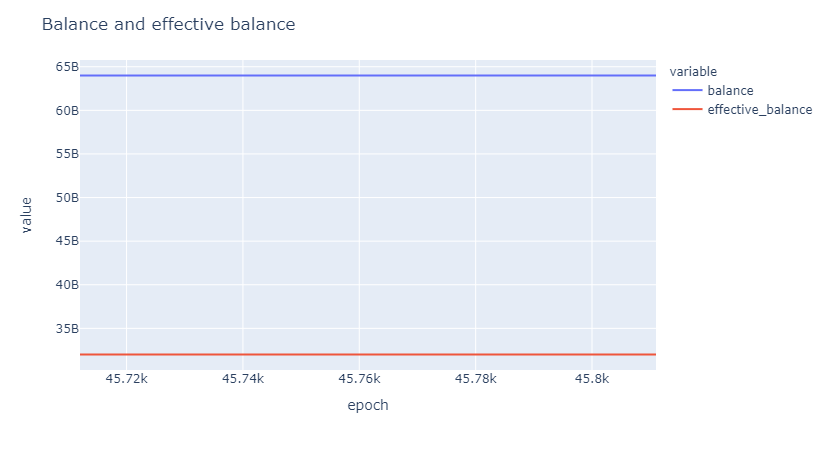

In [20]:
epoch = np.loadtxt("epoch.txt")
balance = np.loadtxt("balance.txt")
effective_balance = np.loadtxt("effectivebalance.txt")

df = pd.DataFrame({ "epoch": epoch, "balance": balance, "effective_balance": effective_balance })
fig = df.plot("epoch", ["balance", "effective_balance"])
fig.update_layout(title="Balance and effective balance")

In [21]:
np.arange(min(df["epoch"]), max(df["epoch"]), bucket_size)

array([45712.])

In [22]:
# epoch1 = []
# balance1 = []
# effective_balance1 = []

# with open('api_key.txt', 'r') as api_file:
#     api_key = api_file.read()
    
# x = requests.get('https://beaconcha.in/api/v1/validator/{}/balancehistory?api_key={}'.format(pub_keys1[56],api_key))
# data = x.json()['data']

# for d in data:
#     epoch1.append(d['epoch'])
#     balance1.append(d['balance'])
#     effective_balance1.append(d['effectivebalance'])

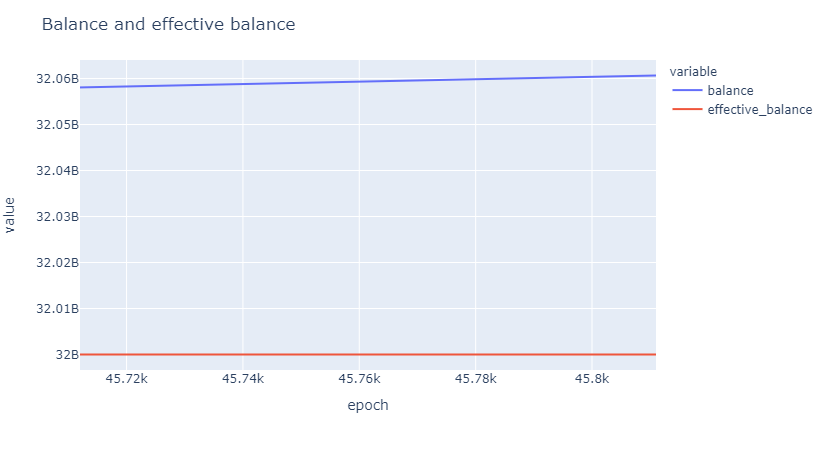

In [23]:
epoch1 = np.loadtxt("epoch_32.txt")
balance1 = np.loadtxt("balance_32.txt")
effective_balance1 = np.loadtxt("effectivebalance_32.txt")

df = pd.DataFrame({ "epoch": epoch1, "balance": balance1, "effective_balance": effective_balance1 })
fig = df.plot("epoch", ["balance", "effective_balance"])
fig.update_layout(title="Balance and effective balance")

We therefore see that despite the balance for the first validator being a lot higher than the second validator over time, their effective balances are roughly the same. Thus the balances for which they receive interests is pretty much the same. 

Since at this phase of PoS Ethereum rollout, all ETH locked into the beacon chain cannot be retrieved even after the validator performs a successful exit or is slashed, the additional 32 ETH is left locked into the Beacon Chain and does not produce any monetary benifits leading to a loss due to opportunity costs!